In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB, BernoulliNB

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r'C:\ACADEMIC\SEM 5\ML\course project work\ML_FinalSubmission_\Gender-and-Emotion-Classification-using-Voice-\assets\scaled_voice_data.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,kurt,sp.ent,sfm,mode,meanfun,minfun,modindx,gender
0,0.602758,0.355976,1.055699,-0.142117,1.567427,1.027768,-0.210519,-0.540272,-0.835728,1.318746,-0.357016,0.582726,-1.266497,male
1,0.642158,0.219537,0.936464,1.053742,0.626879,-0.852602,-0.204561,0.214854,0.510834,0.914485,0.223601,-1.088261,0.743066,female
2,-0.495719,-0.169618,-0.309233,0.445927,-1.448345,-1.307654,-0.139015,-0.257852,0.191444,0.056141,0.986513,-1.022684,0.238451,female
3,-0.708439,0.021716,-0.541947,0.177739,-1.431259,-0.993061,-0.154961,0.057054,0.131876,-2.141210,0.675466,-0.643929,2.324912,female
4,1.763427,-1.871090,1.387941,1.710837,0.914199,-1.441506,-0.130894,-2.543075,-1.691409,0.917164,1.851877,0.805841,-0.133960,female


### Naive Bayes Implementation

In [5]:
class NavieBayesModel:

    def Gaussian_Naive_Bayes(x_train, y_train, x_test, y_test, i, k, display_stats=False):
        NB_model = GaussianNB()
        NB_model.fit(x_train,y_train)
        y_pred = NB_model.predict(x_test)

        
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred, average='weighted')
        recall = metrics.recall_score(y_test, y_pred, average='weighted')
        f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

        if display_stats:
            print(f"Statistics for Fold {i} in K-fold (k={k}) 'Logistic Regression' algorithm")
            print(f"Accuracy: {accuracy}")
            print(f"Precision: {precision}")
            print(f"Recall: {recall}")
            print(f"F1-score: {f1_score}")
            print()
            
        return np.array([accuracy, precision, recall, f1_score])

    def Multinomial_Naive_Bayes(x_train, y_train, x_test, y_test, i, k, display_stats=False):

        NB_model = MultinomialNB()
        NB_model.fit(x_train,y_train)
        y_pred = NB_model.predict(x_test)

        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred, average='weighted')
        recall = metrics.recall_score(y_test, y_pred, average='weighted')
        f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

        if display_stats:
            print(f"Statistics for Fold {i} in K-fold (k={k}) 'Logistic Regression' algorithm")
            print(f"Accuracy: {accuracy}")
            print(f"Precision: {precision}")
            print(f"Recall: {recall}")
            print(f"F1-score: {f1_score}")
            print()
            
        return np.array([accuracy, precision, recall, f1_score])

    def Categorical_Naive_Bayes(x_train, y_train, x_test, y_test, i, k, display_stats=False):
        NB_model = CategoricalNB()
        NB_model.fit(x_train,y_train)
        y_pred = NB_model.predict(x_test)

        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred, average='weighted')
        recall = metrics.recall_score(y_test, y_pred, average='weighted')
        f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

        if display_stats:
            print(f"Statistics for Fold {i} in K-fold (k={k}) 'Logistic Regression' algorithm")
            print(f"Accuracy: {accuracy}")
            print(f"Precision: {precision}")
            print(f"Recall: {recall}")
            print(f"F1-score: {f1_score}")
            print()
            
        return np.array([accuracy, precision, recall, f1_score])

    def Bernoulli_Naive_Bayes(x_train, y_train, x_test, y_test, i, k, display_stats=False):
        NB_model = BernoulliNB()
        NB_model.fit(x_train,y_train)
        y_pred = NB_model.predict(x_test)

        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred, average='weighted')
        recall = metrics.recall_score(y_test, y_pred, average='weighted')
        f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

        if display_stats:
            print(f"Statistics for Fold {i} in K-fold (k={k}) 'Logistic Regression' algorithm")
            print(f"Accuracy: {accuracy}")
            print(f"Precision: {precision}")
            print(f"Recall: {recall}")
            print(f"F1-score: {f1_score}")
            print()
            
        return np.array([accuracy, precision, recall, f1_score])

### Implementing Gaussian Naive Bayes

In [6]:
def run_Gaussian_NaiveBayes():
    x = df.drop('gender', axis=1)
    y = df['gender']

    k = 10
    i = 0
    k_fold = KFold(n_splits=k)

   
    mean_stats = np.zeros(4)

    for train_i, test_i in k_fold.split(x):
        x_train, x_test = x.loc[train_i], x.loc[test_i]
        y_train, y_test = y.loc[train_i], y.loc[test_i]
        
        stats = NavieBayesModel.Gaussian_Naive_Bayes(x_train, y_train, x_test, y_test, i:=i+1, k, display_stats=False)
        # print(stats)
        mean_stats = mean_stats + stats
        
    # Take mean of {accuracy, precision, recall, f1_score}
    mean_stats = mean_stats / k

    print(f"Mean accuracy: {mean_stats[0]}")
    print(f"Mean Precision: {mean_stats[1]}")
    print(f"Mean Recall: {mean_stats[2]}")
    print(f"Mean F1-score: {mean_stats[3]}")

run_Gaussian_NaiveBayes()

Mean accuracy: 0.9280307870462805
Mean Precision: 0.9299319608466858
Mean Recall: 0.9280307870462805
Mean F1-score: 0.9279465032744595


### Bernoulli Naive Bayes

In [7]:
def run_Bernoulli_NaiveBayes():

    x = df.drop('gender', axis=1)
    y = df['gender']

    k = 10
    i = 0
    k_fold = KFold(n_splits=k)

    mean_stats = np.zeros(4)

    for train_i, test_i in k_fold.split(x):
        x_train, x_test = x.loc[train_i], x.loc[test_i]
        y_train, y_test = y.loc[train_i], y.loc[test_i]
        
        stats = NavieBayesModel.Bernoulli_Naive_Bayes(x_train, y_train, x_test, y_test, i:=i+1, k, display_stats=False)
        # print(stats)
        mean_stats = mean_stats + stats
        
    mean_stats = mean_stats / k

    print(f"Mean accuracy: {mean_stats[0]}")
    print(f"Mean Precision: {mean_stats[1]}")
    print(f"Mean Recall: {mean_stats[2]}")
    print(f"Mean F1-score: {mean_stats[3]}")

run_Bernoulli_NaiveBayes()

Mean accuracy: 0.8740486363454858
Mean Precision: 0.8780772201685624
Mean Recall: 0.8740486363454858
Mean F1-score: 0.8737363081050187


### ROC-AUC Curve for Gaussian Naive Bayes

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn import metrics
import matplotlib.pyplot as plt

In [9]:
x = df.drop('gender',axis=1)
y = df['gender']

le = LabelEncoder()
Y_encoded = le.fit_transform(y)

In [10]:
xtrain_roc, xtest_roc, ytrain_roc, ytest_roc = train_test_split(x, Y_encoded, test_size=0.2)


In [14]:
def roc_auc_plot(y_test, y_pred):

    fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(8,8))
    gender_list=['male','female']

    for i in range(2):
        ls=[]
        for j in y_test:
            if i==j:
                ls.append(1)
            else:
                ls.append(0)

        false_positive_rate, true_positive_rate, thresh =  metrics.roc_curve(ls,y_pred[:,i])
        auc = metrics.roc_auc_score(ls,y_pred[:,i])
        axes[i].plot(false_positive_rate, true_positive_rate,  label="AUC = " +str(auc), linestyle='--',color='red')
        axes[i].set_title(f'ROC-AUC curve for class {gender_list[i]}')
        axes[i].set_xlabel('False Positive Rate')
        axes[i].set_ylabel('True Positive rate')
        axes[i].legend(gender_list[i])
        axes[i].text(0.5,0.0, f'AUC value :{auc}')
        plt.savefig(r'C:\ACADEMIC\SEM 5\ML\course project work\ML_FinalSubmission_\Gender-and-Emotion-Classification-using-Voice-\images/ROC-AUC_Gaussian_Naive_Bayes.png',dpi=300)
        plt.tight_layout()

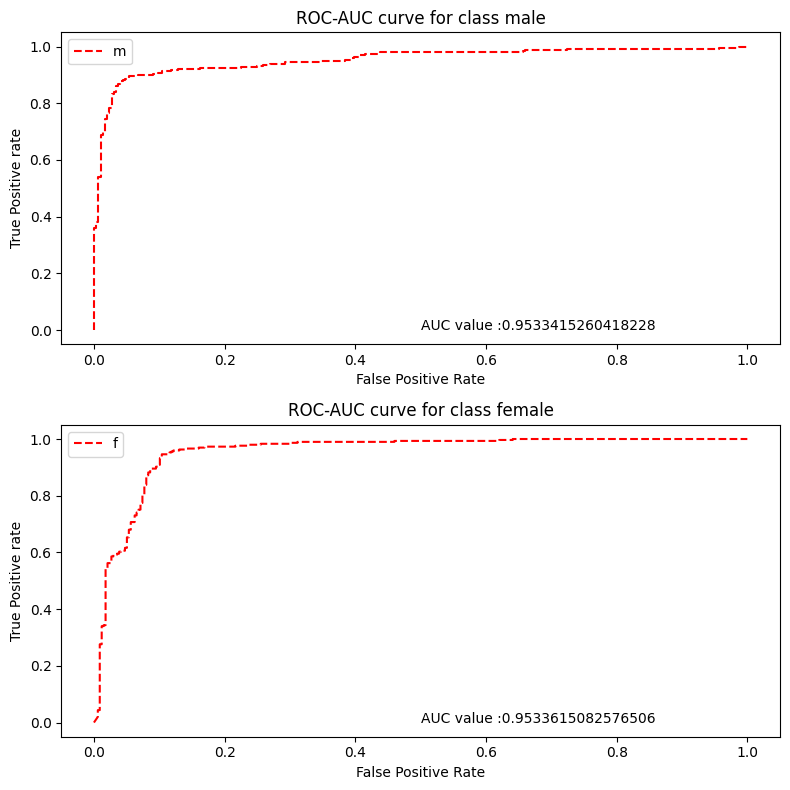

In [15]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(xtrain_roc, ytrain_roc)
ypred_roc = gaussian_nb.predict_proba(xtest_roc)

roc_auc_plot(ytest_roc, ypred_roc)

### Loss curve plot for Gaussian Naive Bayes


In [16]:
x = df.drop('gender', axis=1)
y = df['gender']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

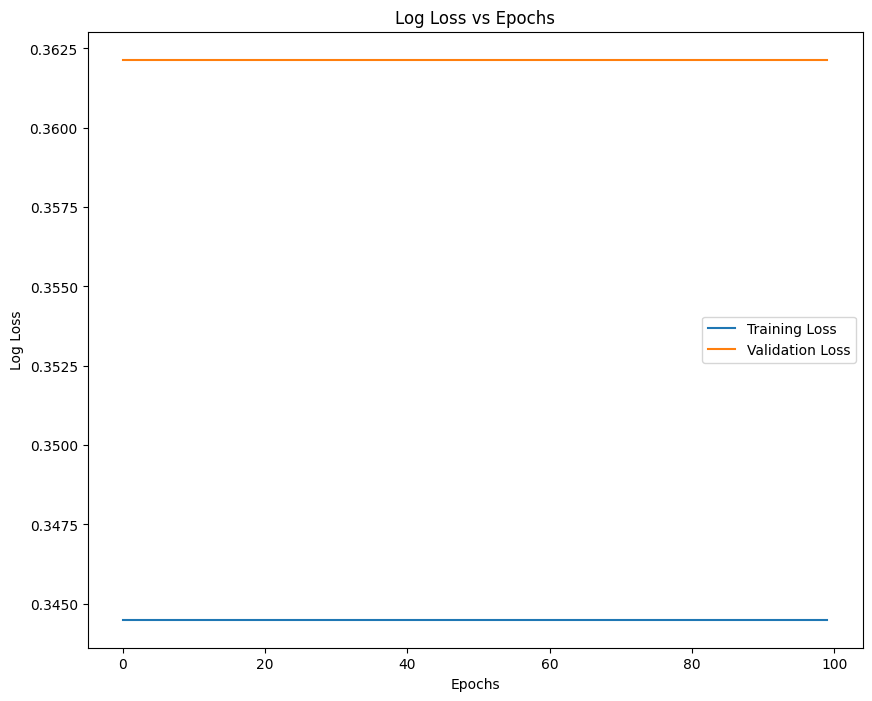

In [18]:
train_loss, test_loss = [], []
epochs = 100

gnb_model = GaussianNB()

for _ in range(epochs):
    gnb_model.partial_fit(x_train, y_train, classes=np.unique(y_train))
    
    train_loss.append(metrics.log_loss(y_train, gnb_model.predict_proba(x_train)))
    test_loss.append(metrics.log_loss(y_test, gnb_model.predict_proba(x_test)))

plt.figure(figsize=(10, 8))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Epochs')
# plt.ylim(0, 5)
plt.legend()
plt.savefig('C:\ACADEMIC\SEM 5\ML\course project work\ML_FinalSubmission_\Gender-and-Emotion-Classification-using-Voice-\images/Log_Loss_Naive_Bayes.png',dpi=300);

### Loss curve plot for Bernoulli Naive Bayes


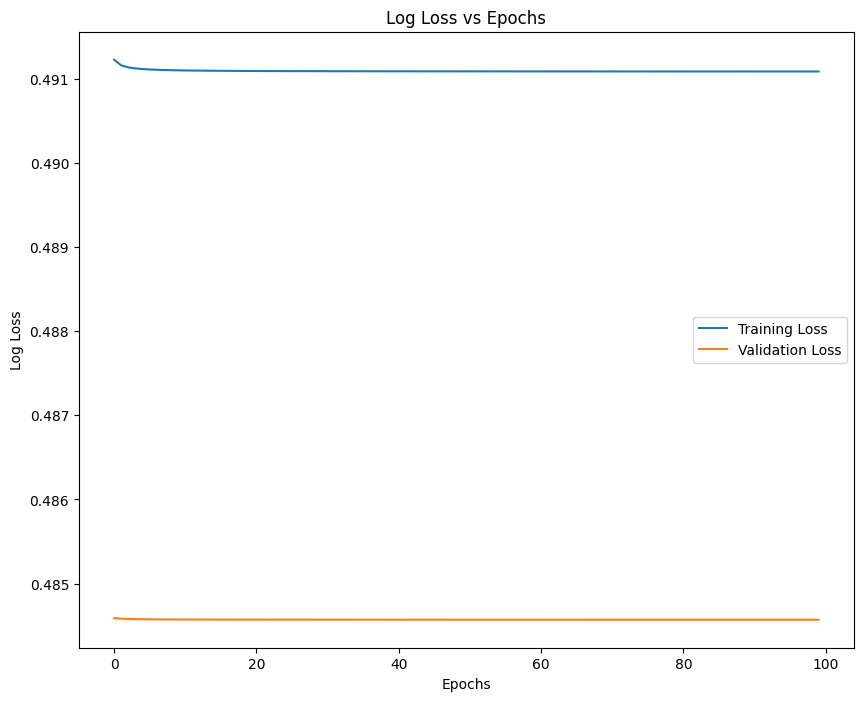

In [19]:
train_loss, test_loss = [], []
epochs = 100

bn_model = BernoulliNB()

for _ in range(epochs):
    bn_model.partial_fit(x_train, y_train, classes=np.unique(y_train))
    
    train_loss.append(metrics.log_loss(y_train, bn_model.predict_proba(x_train)))
    test_loss.append(metrics.log_loss(y_test, bn_model.predict_proba(x_test)))

plt.figure(figsize=(10, 8))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Epochs')
# plt.ylim(0, 5)
plt.legend();